<a href="https://colab.research.google.com/github/diogenesjusto/dotz-mini-curso-ingestao-ml/blob/master/PrevisaoPib_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook com código básico de machine learning
Previsão do PIB mensal baseado no histórico de tráfego
Fontes de dados:

PIB: https://www.itau.com.br/itaubba-pt/analises-economicas/nossas-series-economicas/pib-mensal-itau-unibanco

Tráfego: www.abcr.org.br

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/diogenesjusto/dotz-mini-curso-ingestao-ml/master/PIB.csv', sep=';', decimal=",")
print(df)

    ANO_MES     PIB     BRL     BRP  ...   PIBi9  PIBi10  PIBi11  PIBi12
0    jan/04  103.09  109.19  108.67  ...  101.17  101.70  100.03  100.00
1    fev/04  102.05   95.65  104.52  ...  101.93  101.17  101.70  100.03
2    mar/04  110.43   91.69  125.53  ...   99.96  101.93  101.17  101.70
3    abr/04  106.77   95.36  118.34  ...  102.24   99.96  101.93  101.17
4    mai/04  108.08   92.47  121.49  ...  102.59  102.24   99.96  101.93
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
133  fev/15  144.42  147.35  133.73  ...  154.49  150.92  151.44  148.92
134  mar/15  151.68  149.64  163.27  ...  148.92  154.49  150.92  151.44
135  abr/15  147.03  153.81  149.93  ...  154.34  148.92  154.49  150.92
136  mai/15  148.94  149.66  153.03  ...  154.75  154.34  148.92  154.49
137  jun/15  147.37  146.13  147.98  ...  154.04  154.75  154.34  148.92

[138 rows x 37 columns]


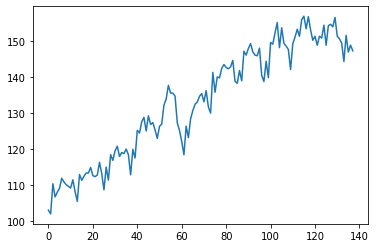

In [0]:
# Análise exploratória - comportamento PIB 12 anos
df.iloc[:, 1].plot.line()

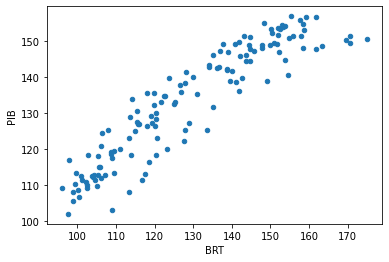

In [0]:
# # Análise de correlação entre PIB e Tráfego Brasil
df.plot.scatter(x='BRT', y='PIB',)

In [0]:
# Separação de bases de treino e teste
treino = df.iloc[0:125,]
teste  = df.iloc[126:135,]


In [0]:
mod1 = LinearRegression()  
X = treino.iloc[:, [5]].values.reshape(-1, 1) 
Y = treino.iloc[:, 1].values.reshape(-1, 1)  
mod1.fit(X, Y)  # perform linear regression

In [0]:
X_Prev = teste.iloc[:, [5]].values.reshape(-1, 1)
prev = mod1.predict(X_Prev)  
print(prev)

[[150.73863513]
 [156.20557141]
 [151.27323658]
 [157.33841734]
 [156.51105795]
 [169.43695734]
 [164.02729979]
 [146.58274527]
 [151.07594319]]


In [0]:
pib_real = teste.iloc[:, [1]].to_numpy()
erro = np.mean(abs(pib_real - prev))
# Erro absoluto médio
print(erro)
# Erro percentual médio
print(erro/np.mean(pib_real))


5.509359356177956
0.03625771211699873
